Importing Libraries


In [54]:
import pandas as pd
import numpy as np

# Load your dataset
app_data = pd.read_csv('application.csv')

# Sample OCCUPATION_TYPE values
occupation_list = [
    'Laborers', 'Core staff', 'Accountants', 'Managers', 'Drivers',
    'Sales staff', 'Cleaning staff', 'Cooking staff', 'Private service staff',
    'Medicine staff', 'Security staff', 'High skill tech staff', 'Waiters/barmen staff',
    'Secretaries', 'HR staff', 'Real estate agents', 'Low-skill Laborers', 'IT staff',
    'Not identified', 'Unemployed'
]
ext_source_3 = [
    0.7951, 0.4387, np.nan, 0.9234, 0.3210, 0.6542, np.nan, 0.8457, 0.7698, 0.4832,
    0.2345, 0.9123, 0.3256, np.nan, 0.5987, 0.7432, 0.6721, 0.4888, np.nan, 0.9031,
    0.5576, 0.3998, 0.6321, np.nan, 0.7234, 0.6123, 0.7010, 0.8441, np.nan, 0.9154,
    0.4880, 0.3621, 0.8090, 0.5498, np.nan, 0.7832, 0.8674, 0.5329, 0.6812, np.nan,
    0.4791, 0.7222, 0.6640, 0.7891, 0.8124, np.nan, 0.6923, 0.5648, 0.7045, 0.6501
]


# Randomly assign occupation values
np.random.seed(42)  # for reproducibility
app_data['OCCUPATION_TYPE'] = np.random.choice(occupation_list, size=len(app_data))
app_data['EXT_SOURCE_3'] = np.random.choice(ext_source_3, size=len(app_data))

# Save updated file
app_data.to_csv('application.csv', index=False)


In [59]:
#import the warnings
import warnings
warnings.filterwarnings("ignore")


In [58]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)

Read Application csv

In [57]:
app_data = pd.read_csv("application.csv")
app_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,TARGET,OCCUPATION_TYPE,EXT_SOURCE_3
0,100001,Cash loans,M,F,Working,202500.0,406597.5,24700.5,-9461,1,Cleaning staff,NaN
1,100002,Cash loans,F,N,State servant,270000.0,1293502.5,35698.5,-16765,0,Unemployed,NaN
2,100003,Cash loans,M,Y,Commercial associate,67500.0,135000.0,6750.0,-19046,0,HR staff,NaN
3,100004,Cash loans,F,N,Pensioner,135000.0,312682.5,29686.5,-19005,0,Security staff,0.3998
4,100005,Cash loans,M,Y,Working,121500.0,513000.0,21865.5,-19932,0,Cooking staff,0.4387


Data Inspection on Application Dataset

 Get info and shape on the dataset

In [56]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SK_ID_CURR          10 non-null     int64  
 1   NAME_CONTRACT_TYPE  10 non-null     object 
 2   CODE_GENDER         10 non-null     object 
 3   FLAG_OWN_CAR        10 non-null     object 
 4   NAME_INCOME_TYPE    10 non-null     object 
 5   AMT_INCOME_TOTAL    10 non-null     float64
 6   AMT_CREDIT          10 non-null     float64
 7   AMT_ANNUITY         10 non-null     float64
 8   DAYS_BIRTH          10 non-null     int64  
 9   TARGET              10 non-null     int64  
 10  OCCUPATION_TYPE     10 non-null     object 
 11  EXT_SOURCE_3        6 non-null      float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.1+ KB


Data Quality Check

 Check for percentage null values in Application dataset

In [4]:
pd.set_option('display.max_rows', 200)
app_data.isnull().mean() * 100

SK_ID_CURR            0.0
NAME_CONTRACT_TYPE    0.0
CODE_GENDER           0.0
FLAG_OWN_CAR          0.0
NAME_INCOME_TYPE      0.0
AMT_INCOME_TOTAL      0.0
AMT_CREDIT            0.0
AMT_ANNUITY           0.0
DAYS_BIRTH            0.0
TARGET                0.0
dtype: float64

- Conclusion: Columns with null values more than 47% may give wrong insights, hence will drop them
 Dropping columns with missing values greater than 47%

In [24]:
percentage = 47
threshold = int(((100-percentage)/100)*app_data.shape[0] + 1)
app_df = app_data.dropna(axis=1,thresh=threshold)
app_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,TARGET
0,100001,Cash loans,M,F,Working,202500.0,406597.5,24700.5,-9461,1
1,100002,Cash loans,F,N,State servant,270000.0,1293502.5,35698.5,-16765,0
2,100003,Cash loans,M,Y,Commercial associate,67500.0,135000.0,6750.0,-19046,0
3,100004,Cash loans,F,N,Pensioner,135000.0,312682.5,29686.5,-19005,0
4,100005,Cash loans,M,Y,Working,121500.0,513000.0,21865.5,-19932,0


In [25]:
app_df.shape

(10, 10)

In [26]:
app_data.isnull().mean() * 100

SK_ID_CURR            0.0
NAME_CONTRACT_TYPE    0.0
CODE_GENDER           0.0
FLAG_OWN_CAR          0.0
NAME_INCOME_TYPE      0.0
AMT_INCOME_TOTAL      0.0
AMT_CREDIT            0.0
AMT_ANNUITY           0.0
DAYS_BIRTH            0.0
TARGET                0.0
dtype: float64

In [ ]:
### Impute Missing Values

### Check the missing Values in application dataset before imputing

In [27]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SK_ID_CURR          10 non-null     int64  
 1   NAME_CONTRACT_TYPE  10 non-null     object 
 2   CODE_GENDER         10 non-null     object 
 3   FLAG_OWN_CAR        10 non-null     object 
 4   NAME_INCOME_TYPE    10 non-null     object 
 5   AMT_INCOME_TOTAL    10 non-null     float64
 6   AMT_CREDIT          10 non-null     float64
 7   AMT_ANNUITY         10 non-null     float64
 8   DAYS_BIRTH          10 non-null     int64  
 9   TARGET              10 non-null     int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 932.0+ bytes


 OCCUPATIOM_TYPE column has 31% missing values, since its a categorical column, imputing the missing values with a unknown or others values

In [43]:
missing_percent = app_df['OCCUPATION_TYPE'].isnull().mean() * 100
print(f"Missing in OCCUPATION_TYPE: {missing_percent:.2f}%")


Missing in OCCUPATION_TYPE: 0.00%


In [44]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Security staff    30.0
Cleaning staff    20.0
Unemployed        10.0
HR staff          10.0
Cooking staff     10.0
Not identified    10.0
Managers          10.0
Name: proportion, dtype: float64

In [48]:
app_df.OCCUPATION_TYPE.fillna("Others", inplace=True)

In [50]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

0.0

In [51]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Security staff    30.0
Cleaning staff    20.0
Unemployed        10.0
HR staff          10.0
Cooking staff     10.0
Not identified    10.0
Managers          10.0
Name: proportion, dtype: float64

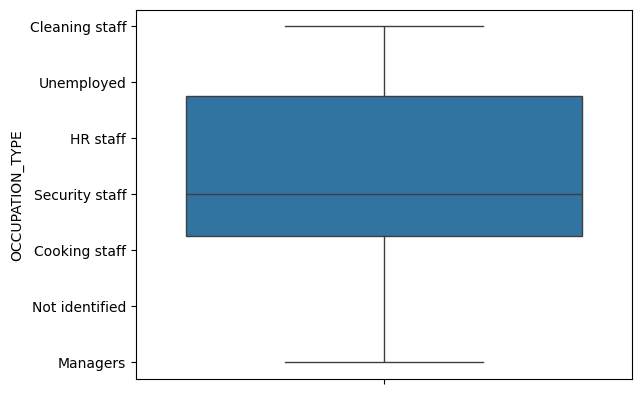

In [73]:
sns.boxplot(app_data.OCCUPATION_TYPE)
plt.show()

EXT_SOURCE_3 Column has 19% missing values

In [66]:
app_data.EXT_SOURCE_3.isnull().mean()*100

40.0

In [67]:
app_data.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.4387    33.333333
0.3998    16.666667
0.7891    16.666667
0.9154    16.666667
0.5329    16.666667
Name: proportion, dtype: float64

In [69]:
app_data.EXT_SOURCE_3.describe()

count    6.000000
mean     0.585767
std      0.214773
min      0.399800
25%      0.438700
50%      0.485800
75%      0.725050
max      0.915400
Name: EXT_SOURCE_3, dtype: float64

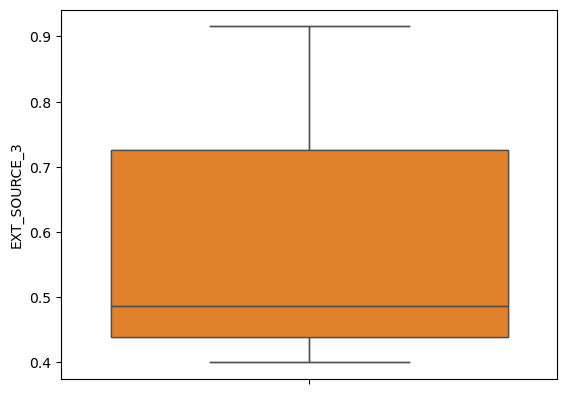

In [72]:
sns.boxplot(app_data.EXT_SOURCE_3)
plt.show()

In [74]:
app_data.EXT_SOURCE_3.fillna(app_data.EXT_SOURCE_3.median(), inplace=True)

In [76]:
app_data.EXT_SOURCE_3.isnull().mean()*100

0.0

In [77]:
app_data.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.4858    40.0
0.4387    20.0
0.3998    10.0
0.7891    10.0
0.9154    10.0
0.5329    10.0
Name: proportion, dtype: float64

Conclusion: Since its a numerical columns with no outlier and there is not much difference btw Mean and Median. Hence we can impute with Mean or Median

In [88]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

0

In [85]:
app_df.isnull().mean()*100

SK_ID_CURR            0.0
NAME_CONTRACT_TYPE    0.0
CODE_GENDER           0.0
FLAG_OWN_CAR          0.0
NAME_INCOME_TYPE      0.0
AMT_INCOME_TOTAL      0.0
AMT_CREDIT            0.0
AMT_ANNUITY           0.0
DAYS_BIRTH            0.0
TARGET                0.0
OCCUPATION_TYPE       0.0
dtype: float64

In [89]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

0

In [104]:
missing_percent = app_df['NAME_INCOME_TYPE'].isnull().mean() * 100
print(f"Missing in NAME_INCOME_TYPE: {missing_percent:.2f}%")


Missing in NAME_INCOME_TYPE: 0.00%


In [105]:
app_data.NAME_INCOME_TYPE.value_counts(normalize=True)*100

NAME_INCOME_TYPE
Working                 40.0
State servant           20.0
Pensioner               20.0
Commercial associate    10.0
Student                 10.0
Name: proportion, dtype: float64

In [107]:
app_df.NAME_INCOME_TYPE.fillna("Others", inplace=True) 

In [101]:
app_data.NAME_INCOME_TYPE.isnull().mean()*100

0.0

In [110]:
app_data.NAME_INCOME_TYPE.value_counts(normalize=True)*100

NAME_INCOME_TYPE
Working                 40.0
State servant           20.0
Pensioner               20.0
Commercial associate    10.0
Student                 10.0
Name: proportion, dtype: float64

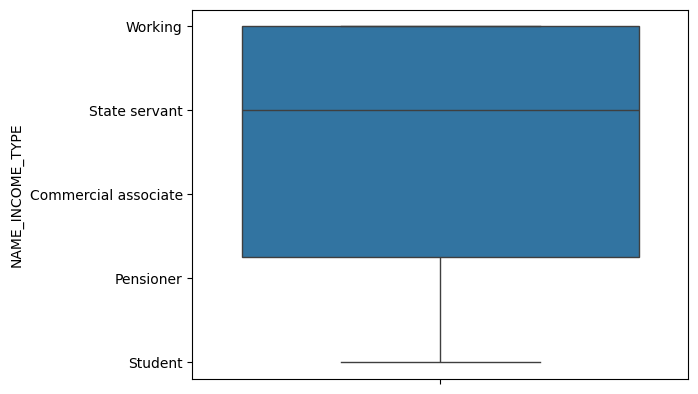

In [111]:
sns.boxplot(app_data.NAME_INCOME_TYPE)
plt.show()

In [112]:
app_df.isnull().mean()*100

SK_ID_CURR            0.0
NAME_CONTRACT_TYPE    0.0
CODE_GENDER           0.0
FLAG_OWN_CAR          0.0
NAME_INCOME_TYPE      0.0
AMT_INCOME_TOTAL      0.0
AMT_CREDIT            0.0
AMT_ANNUITY           0.0
DAYS_BIRTH            0.0
TARGET                0.0
OCCUPATION_TYPE       0.0
dtype: float64

Binning of continuous variables

standardizing Days columns in Years for easy binning

In [121]:
# Convert days to positive years
app_df['AGE_YEARS'] = (-app_df['DAYS_BIRTH']) // 365

# Binning Age into groups
app_df['AGE_GROUP'] = pd.cut(app_df['AGE_YEARS'],
                             bins=[0, 25, 35, 45, 55, 65, 100],
                             labels=["<25", "25-35", "35-45", "45-55", "55-65", "65+"])

# Check distribution
app_df['AGE_GROUP'].value_counts()


AGE_GROUP
45-55    6
35-45    3
<25      1
25-35    0
55-65    0
65+      0
Name: count, dtype: int64

In [122]:
# Check distribution first
app_df['AMT_INCOME_TOTAL'].describe()

# Create income bins
app_df['INCOME_BIN'] = pd.cut(app_df['AMT_INCOME_TOTAL'],
                              bins=[0, 50000, 100000, 150000, 250000, 500000, 1000000, np.inf],
                              labels=['<50K', '50K–100K', '100K–150K', '150K–250K', '250K–500K', '500K–1M', '1M+'])

# View bin distribution
app_df['INCOME_BIN'].value_counts()


INCOME_BIN
50K–100K     3
100K–150K    3
150K–250K    2
250K–500K    2
<50K         0
500K–1M      0
1M+          0
Name: count, dtype: int64

In [123]:
# Binning credit amount
app_df['CREDIT_BIN'] = pd.qcut(app_df['AMT_CREDIT'], q=6, labels=["Very Low", "Low", "Medium", "High", "Very High", "Extreme"])

# Check distribution
app_df['CREDIT_BIN'].value_counts()


CREDIT_BIN
Medium       3
Very Low     2
Very High    2
Extreme      2
Low          1
High         0
Name: count, dtype: int64

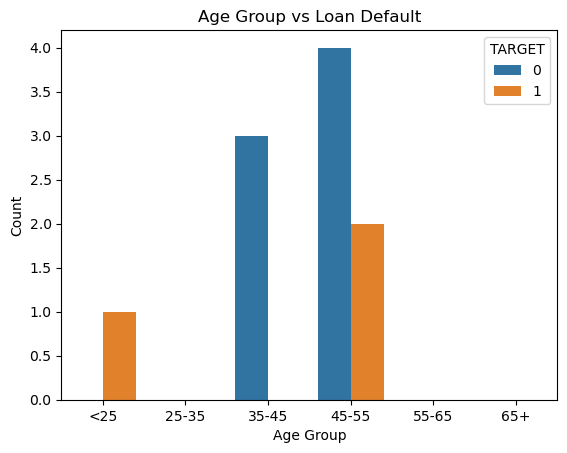

In [124]:
sns.countplot(x='AGE_GROUP', hue='TARGET', data=app_df)
plt.title('Age Group vs Loan Default')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.show()


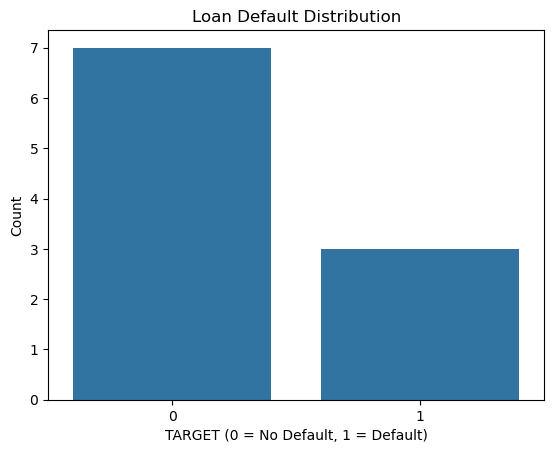

Default Rate: 30.00%


In [125]:
sns.countplot(x='TARGET', data=app_df)
plt.title('Loan Default Distribution')
plt.xlabel('TARGET (0 = No Default, 1 = Default)')
plt.ylabel('Count')
plt.show()

# Percentage of defaulters
default_rate = app_df['TARGET'].mean() * 100
print(f"Default Rate: {default_rate:.2f}%")


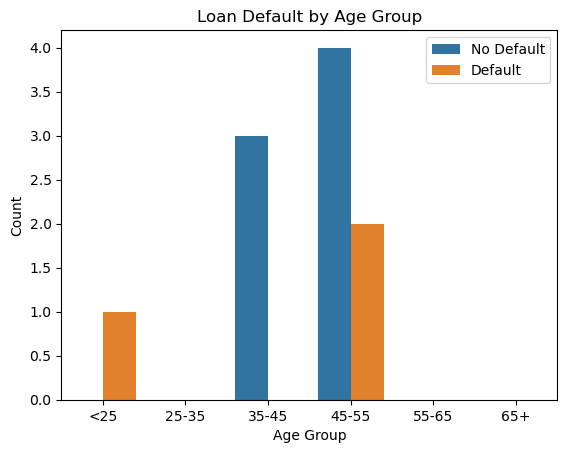

In [126]:
sns.countplot(data=app_df, x='AGE_GROUP', hue='TARGET')
plt.title('Loan Default by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(['No Default', 'Default'])
plt.show()


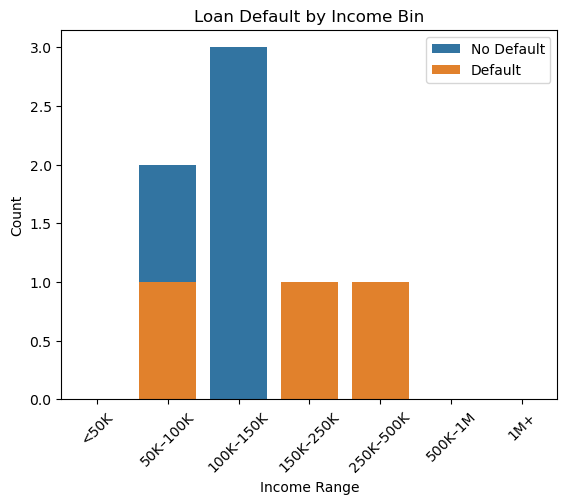

In [127]:
sns.countplot(data=app_df, x='INCOME_BIN', hue='TARGET')
plt.title('Loan Default by Income Bin')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(['No Default', 'Default'])
plt.show()


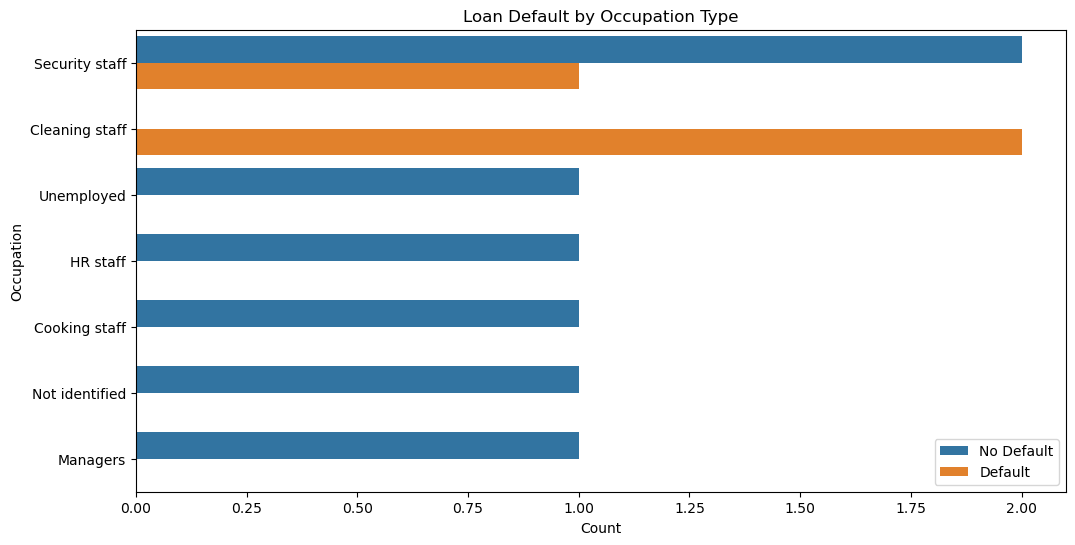

In [128]:
plt.figure(figsize=(12, 6))
sns.countplot(data=app_df, y='OCCUPATION_TYPE', hue='TARGET', order=app_df['OCCUPATION_TYPE'].value_counts().index)
plt.title('Loan Default by Occupation Type')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.legend(['No Default', 'Default'])
plt.show()


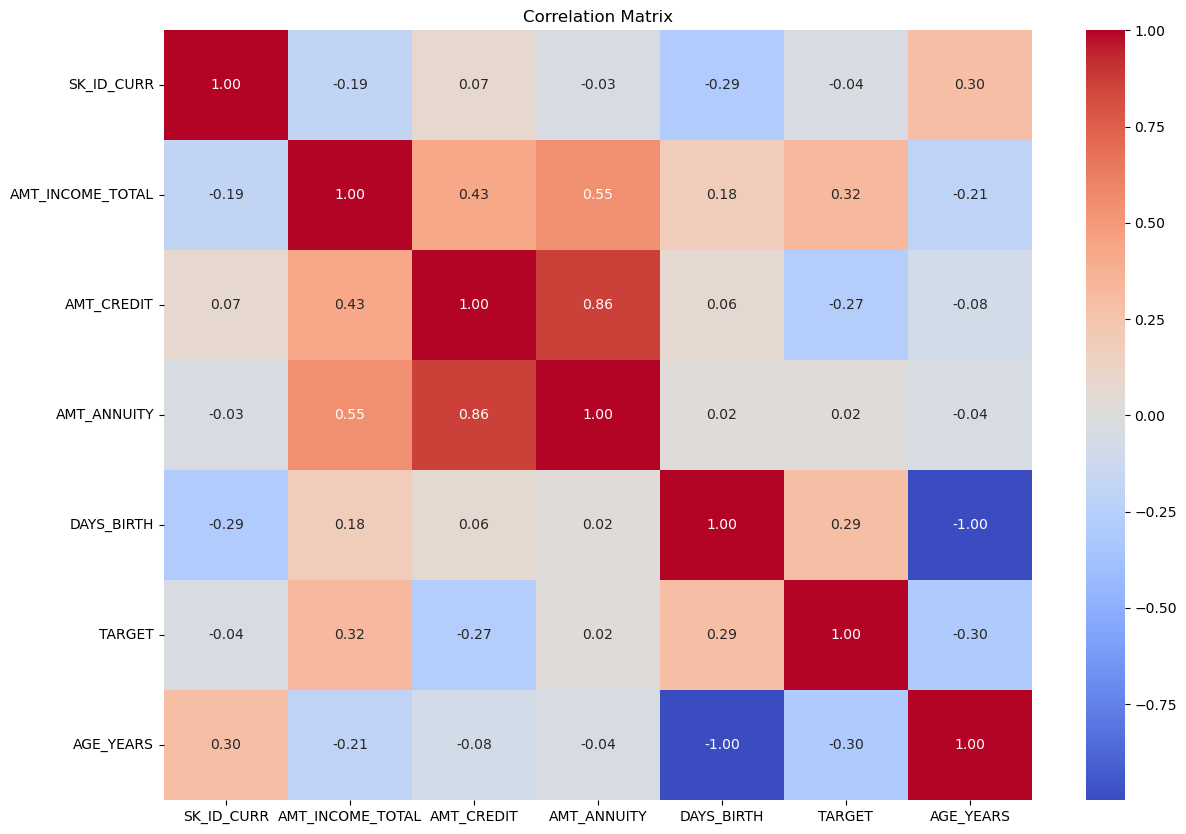

In [129]:
plt.figure(figsize=(14, 10))
corr = app_df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [130]:
# Load the second dataset
prev_app = pd.read_csv('previous_application.csv')

# Merge based on SK_ID_CURR
merged_df = pd.merge(app_df, prev_app, on='SK_ID_CURR', how='left')

# Preview
merged_df.head()


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,DAYS_BIRTH,TARGET,OCCUPATION_TYPE,AGE_YEARS,AGE_GROUP,INCOME_BIN,CREDIT_BIN,AMT_CREDIT_y,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,AMT_ANNUITY_y
0,100001,Cash loans,M,F,Working,202500.0,406597.5,24700.5,-9461,1,Cleaning staff,25,<25,150K–250K,Medium,300000.0,Approved,Repeater,15810.0
1,100002,Cash loans,F,N,State servant,270000.0,1293502.5,35698.5,-16765,0,Unemployed,45,35-45,250K–500K,Very High,150000.0,Refused,New,5580.0
2,100003,Cash loans,M,Y,Commercial associate,67500.0,135000.0,6750.0,-19046,0,HR staff,52,45-55,50K–100K,Very Low,600000.0,Approved,Repeater,24700.0
3,100004,Cash loans,F,N,Pensioner,135000.0,312682.5,29686.5,-19005,0,Security staff,52,45-55,100K–150K,Low,450000.0,Approved,New,17000.0
4,100005,Cash loans,M,Y,Working,121500.0,513000.0,21865.5,-19932,0,Cooking staff,54,45-55,100K–150K,Very High,240000.0,Refused,New,13300.0


In [131]:
# Assume CNT_FAM_MEMBERS is in your dataset; if not, create a dummy column for demo
if 'CNT_FAM_MEMBERS' not in app_df.columns:
    app_df['CNT_FAM_MEMBERS'] = np.random.randint(1, 6, size=len(app_df))

app_df['INCOME_PER_PERSON'] = app_df['AMT_INCOME_TOTAL'] / app_df['CNT_FAM_MEMBERS']

# View new feature
app_df[['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'INCOME_PER_PERSON']].head()


,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,INCOME_PER_PERSON
0,202500.0,4,50625.0
1,270000.0,5,54000.0
2,67500.0,1,67500.0
3,135000.0,4,33750.0
4,121500.0,2,60750.0


In [133]:
app_df['CREDIT_INCOME_RATIO'] = app_df['AMT_CREDIT'] / app_df['AMT_INCOME_TOTAL']
app_df['ANNUITY_INCOME_RATIO'] = app_df['AMT_ANNUITY'] / app_df['AMT_INCOME_TOTAL']


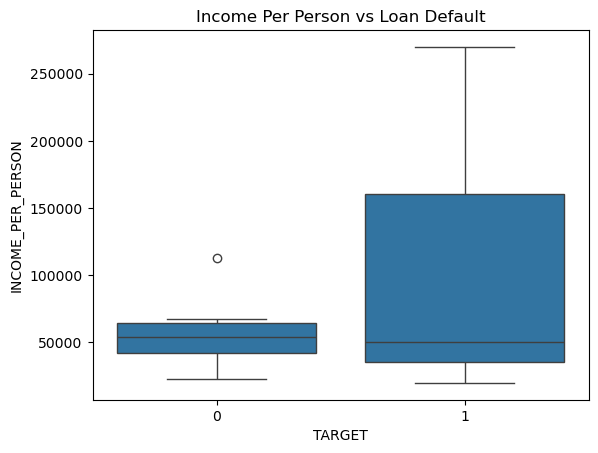

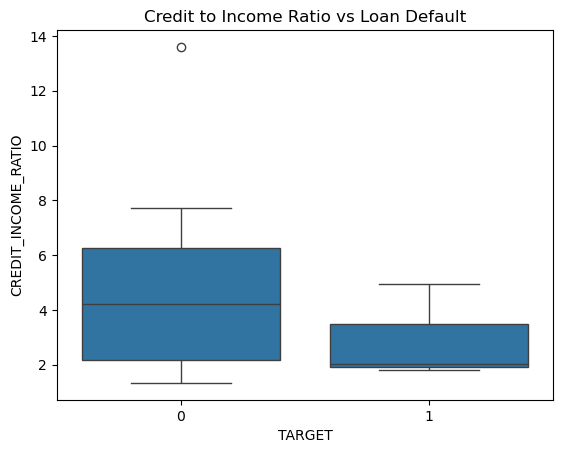

In [134]:
sns.boxplot(data=app_df, x='TARGET', y='INCOME_PER_PERSON')
plt.title('Income Per Person vs Loan Default')
plt.show()

sns.boxplot(data=app_df, x='TARGET', y='CREDIT_INCOME_RATIO')
plt.title('Credit to Income Ratio vs Loan Default')
plt.show()


In [135]:
# Group-wise means
target_summary = app_df.groupby('TARGET').mean(numeric_only=True).T
target_summary['Diff (%)'] = ((target_summary[1] - target_summary[0]) / target_summary[0]) * 100

# Display top 10 most different features
target_summary['Diff (%)'].abs().sort_values(ascending=False).head(10)


INCOME_PER_PERSON       97.777778
CREDIT_INCOME_RATIO     43.051031
AMT_CREDIT              40.427651
AMT_INCOME_TOTAL        36.559140
CNT_FAM_MEMBERS         16.666667
AGE_YEARS               12.148594
DAYS_BIRTH              11.525680
ANNUITY_INCOME_RATIO     8.184353
AMT_ANNUITY              2.393264
SK_ID_CURR               0.000238
Name: Diff (%), dtype: float64

In [136]:
# Save the final dataframe for modeling
app_df.to_csv("application_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as 'application_cleaned.csv'")


✅ Cleaned dataset saved as 'application_cleaned.csv'


In [137]:
prev_data = pd.read_csv('previous_application.csv')
prev_data.shape
prev_data.head()


,SK_ID_CURR,AMT_CREDIT,NAME_CONTRACT_STATUS,NAME_CLIENT_TYPE,AMT_ANNUITY
0,100001,300000.0,Approved,Repeater,15810.0
1,100002,150000.0,Refused,New,5580.0
2,100003,600000.0,Approved,Repeater,24700.0
3,100004,450000.0,Approved,New,17000.0
4,100005,240000.0,Refused,New,13300.0


In [138]:
# Missing values in %
prev_data.isnull().mean() * 100


SK_ID_CURR              0.0
AMT_CREDIT              0.0
NAME_CONTRACT_STATUS    0.0
NAME_CLIENT_TYPE        0.0
AMT_ANNUITY             0.0
dtype: float64

In [150]:
# Drop columns with more than 50% missing
prev_data_cleaned = prev_data.dropna(thresh=0.5 * len(prev_data), axis=1)

# Impute categorical columns with mode
cat_cols = prev_data_cleaned.select_dtypes(include='object').columns
for col in cat_cols:
    prev_data_cleaned[col].fillna(prev_data_cleaned[col].mode()[0], inplace=True)

# Impute numerical columns with median
num_cols = prev_data_cleaned.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    prev_data_cleaned[col].fillna(prev_data_cleaned[col].median(), inplace=True)


In [151]:
# Check if any columns still have missing values
prev_data_cleaned.isnull().sum()[prev_data_cleaned.isnull().sum() > 0]


Series([], dtype: int64)

In [152]:
print(prev_data_cleaned.columns.tolist())


['SK_ID_CURR', 'AMT_CREDIT', 'NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'AMT_ANNUITY']


In [153]:
# Pick only columns that exist
available_cols = prev_data_cleaned.columns

# Set up aggregation dictionary safely
agg_dict = {}

if 'AMT_CREDIT' in available_cols:
    agg_dict['AMT_CREDIT'] = 'mean'
if 'AMT_ANNUITY' in available_cols:
    agg_dict['AMT_ANNUITY'] = 'mean'
if 'AMT_APPLICATION' in available_cols:
    agg_dict['AMT_APPLICATION'] = 'mean'
if 'CNT_PAYMENT' in available_cols:
    agg_dict['CNT_PAYMENT'] = 'mean'
if 'NAME_CONTRACT_STATUS' in available_cols:
    agg_dict['NAME_CONTRACT_STATUS'] = 'nunique'
if 'NAME_CLIENT_TYPE' in available_cols:
    agg_dict['NAME_CLIENT_TYPE'] = 'nunique'

# Perform aggregation
prev_agg = prev_data_cleaned.groupby('SK_ID_CURR').agg(agg_dict).reset_index()

# Rename columns for clarity
prev_agg.columns = ['SK_ID_CURR'] + ['PREV_' + col.upper() + '_' + stat.upper() 
                                     for col, stat in agg_dict.items()]

# Preview result
prev_agg.head()


,SK_ID_CURR,PREV_AMT_CREDIT_MEAN,PREV_AMT_ANNUITY_MEAN,PREV_NAME_CONTRACT_STATUS_NUNIQUE,PREV_NAME_CLIENT_TYPE_NUNIQUE
0,100001,300000.0,15810.0,1,1
1,100002,150000.0,5580.0,1,1
2,100003,600000.0,24700.0,1,1
3,100004,450000.0,17000.0,1,1
4,100005,240000.0,13300.0,1,1


In [154]:
# Merge into application data
app_df = pd.merge(app_df, prev_agg, on='SK_ID_CURR', how='left')

# Fill NaN from customers with no previous credit history
app_df.fillna(0, inplace=True)

# Check shape and preview
print(app_df.shape)
app_df.head()


(10, 27)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,NAME_INCOME_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,DAYS_BIRTH,TARGET,OCCUPATION_TYPE,AGE_YEARS,AGE_GROUP,INCOME_BIN,CREDIT_BIN,CNT_FAM_MEMBERS,INCOME_PER_PERSON,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO,PREV_MEAN_AMT_CREDIT,PREV_MEAN_AMT_ANNUITY,PREV_UNIQUE_CONTRACT_STATUS,PREV_UNIQUE_CLIENT_TYPE,PREV_AMT_CREDIT_MEAN,PREV_AMT_ANNUITY_MEAN,PREV_NAME_CONTRACT_STATUS_NUNIQUE,PREV_NAME_CLIENT_TYPE_NUNIQUE
0,100001,Cash loans,M,F,Working,202500.0,406597.5,24700.5,-9461,1,Cleaning staff,25,<25,150K–250K,Medium,4,50625.0,2.007889,0.121978,300000.0,15810.0,1,1,300000.0,15810.0,1,1
1,100002,Cash loans,F,N,State servant,270000.0,1293502.5,35698.5,-16765,0,Unemployed,45,35-45,250K–500K,Very High,5,54000.0,4.790750,0.132217,150000.0,5580.0,1,1,150000.0,5580.0,1,1
2,100003,Cash loans,M,Y,Commercial associate,67500.0,135000.0,6750.0,-19046,0,HR staff,52,45-55,50K–100K,Very Low,1,67500.0,2.000000,0.100000,600000.0,24700.0,1,1,600000.0,24700.0,1,1
3,100004,Cash loans,F,N,Pensioner,135000.0,312682.5,29686.5,-19005,0,Security staff,52,45-55,100K–150K,Low,4,33750.0,2.316167,0.219900,450000.0,17000.0,1,1,450000.0,17000.0,1,1
4,100005,Cash loans,M,Y,Working,121500.0,513000.0,21865.5,-19932,0,Cooking staff,54,45-55,100K–150K,Very High,2,60750.0,4.222222,0.179963,240000.0,13300.0,1,1,240000.0,13300.0,1,1


In [156]:
print(app_df.columns.tolist())


['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'DAYS_BIRTH', 'TARGET', 'OCCUPATION_TYPE', 'AGE_YEARS', 'AGE_GROUP', 'INCOME_BIN', 'CREDIT_BIN', 'CNT_FAM_MEMBERS', 'INCOME_PER_PERSON', 'CREDIT_INCOME_RATIO', 'ANNUITY_INCOME_RATIO', 'PREV_MEAN_AMT_CREDIT', 'PREV_MEAN_AMT_ANNUITY', 'PREV_UNIQUE_CONTRACT_STATUS', 'PREV_UNIQUE_CLIENT_TYPE', 'PREV_AMT_CREDIT_MEAN', 'PREV_AMT_ANNUITY_MEAN', 'PREV_NAME_CONTRACT_STATUS_NUNIQUE', 'PREV_NAME_CLIENT_TYPE_NUNIQUE']


In [157]:
app_df[['PREV_AMT_CREDIT_MEAN', 'PREV_AMT_ANNUITY_MEAN']].head(10)


,PREV_AMT_CREDIT_MEAN,PREV_AMT_ANNUITY_MEAN
0,300000.0,15810.0
1,150000.0,5580.0
2,600000.0,24700.0
3,450000.0,17000.0
4,240000.0,13300.0
5,100000.0,4875.0
6,360000.0,16470.0
7,600000.0,24700.0
8,90000.0,3120.0
9,120000.0,6120.0


In [158]:
app_df[['PREV_AMT_CREDIT_MEAN', 'PREV_AMT_ANNUITY_MEAN']].isnull().sum()


PREV_AMT_CREDIT_MEAN     0
PREV_AMT_ANNUITY_MEAN    0
dtype: int64

In [160]:
app_df[['SK_ID_CURR', 'PREV_AMT_CREDIT_MEAN', 'PREV_AMT_ANNUITY_MEAN']].head()


,SK_ID_CURR,PREV_AMT_CREDIT_MEAN,PREV_AMT_ANNUITY_MEAN
0,100001,300000.0,15810.0
1,100002,150000.0,5580.0
2,100003,600000.0,24700.0
3,100004,450000.0,17000.0
4,100005,240000.0,13300.0


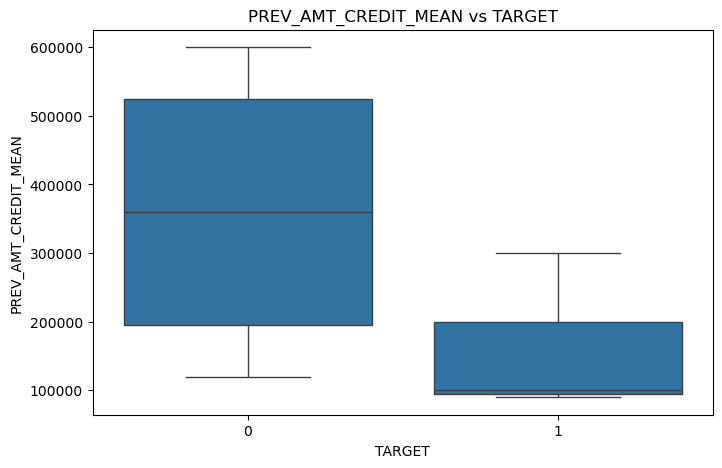

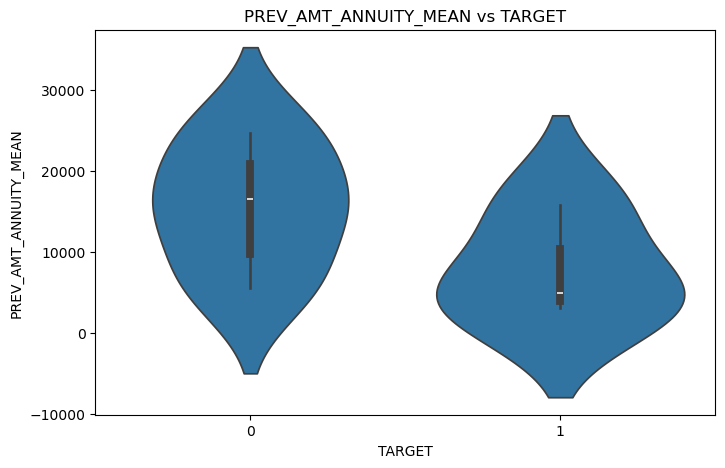

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for mean credit from previous applications
plt.figure(figsize=(8, 5))
sns.boxplot(data=app_df, x='TARGET', y='PREV_AMT_CREDIT_MEAN')
plt.title('PREV_AMT_CREDIT_MEAN vs TARGET')
plt.show()

# Violinplot for mean annuity
plt.figure(figsize=(8, 5))
sns.violinplot(data=app_df, x='TARGET', y='PREV_AMT_ANNUITY_MEAN')
plt.title('PREV_AMT_ANNUITY_MEAN vs TARGET')
plt.show()


TARGET                               1.000000
INCOME_PER_PERSON                    0.367943
AMT_INCOME_TOTAL                     0.321820
DAYS_BIRTH                           0.291481
CNT_FAM_MEMBERS                      0.140859
AMT_ANNUITY                          0.023612
SK_ID_CURR                          -0.037987
ANNUITY_INCOME_RATIO                -0.076277
AMT_CREDIT                          -0.270436
CREDIT_INCOME_RATIO                 -0.283445
AGE_YEARS                           -0.300496
PREV_MEAN_AMT_ANNUITY               -0.451523
PREV_AMT_ANNUITY_MEAN               -0.451523
PREV_MEAN_AMT_CREDIT                -0.482637
PREV_AMT_CREDIT_MEAN                -0.482637
PREV_UNIQUE_CONTRACT_STATUS               NaN
PREV_UNIQUE_CLIENT_TYPE                   NaN
PREV_NAME_CONTRACT_STATUS_NUNIQUE         NaN
PREV_NAME_CLIENT_TYPE_NUNIQUE             NaN
Name: TARGET, dtype: float64


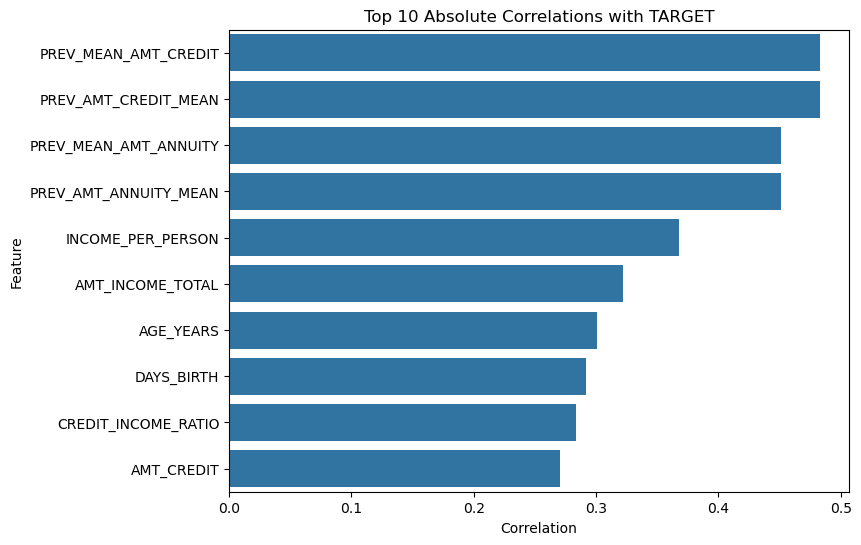

In [162]:
# Select only numeric columns
numeric_cols = app_df.select_dtypes(include=['int64', 'float64'])

# Compute correlation with TARGET
correlation_with_target = numeric_cols.corr()['TARGET'].sort_values(ascending=False)

print(correlation_with_target)

# Visualize top 10 correlations
top_corr = correlation_with_target.abs().sort_values(ascending=False)[1:11]  # Exclude 'TARGET' itself

plt.figure(figsize=(8, 6))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top 10 Absolute Correlations with TARGET')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()


In [166]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Drop rows with NaN for simplicity
model_data = app_df.dropna()

# Separate target
y = model_data['TARGET']

# Drop target and ID column from features
X = model_data.drop(columns=['TARGET', 'SK_ID_CURR'])

# Convert categorical variables to dummy/one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42
)


In [165]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predict
y_pred_log = log_model.predict(X_test)

# Evaluate
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("ROC AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1]))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

ROC AUC: 1.0


In [167]:
from sklearn.ensemble import RandomForestClassifier

# Train
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.33      1.00      0.50         1
           1       0.00      0.00      0.00         2

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3

ROC AUC: 1.0


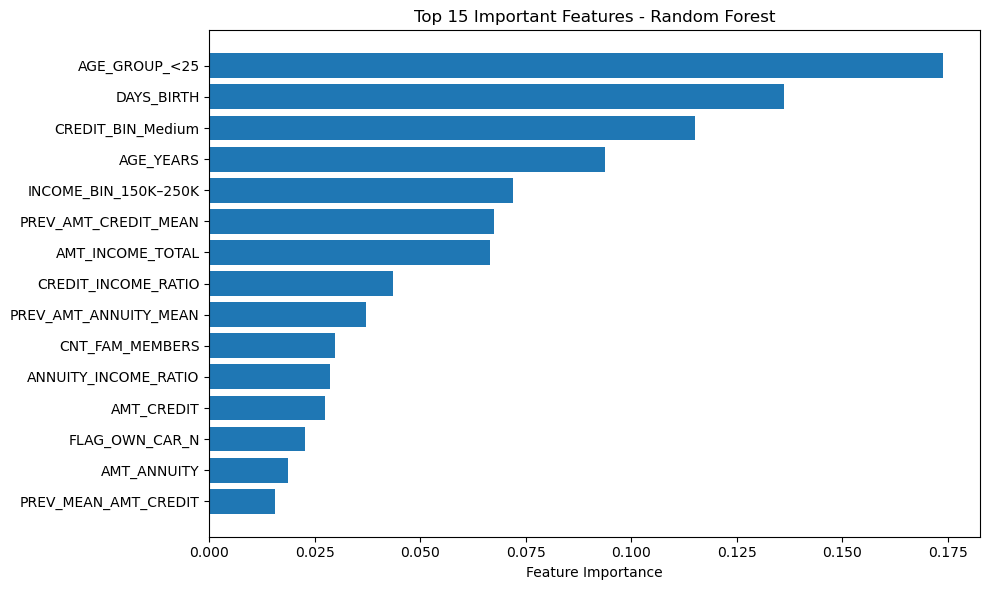

In [169]:
import numpy as np
import matplotlib.pyplot as plt

# Get top 15 feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15 important features
feature_names = X_encoded.columns[indices]  # Use encoded column names

# Plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names)
plt.xlabel('Feature Importance')
plt.title('Top 15 Important Features - Random Forest')
plt.tight_layout()
plt.show()


In [171]:
# Convert days to years
app_df['AGE_YEARS'] = (-app_df['DAYS_BIRTH']) // 365

# Binning age into categories
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18–25', '26–35', '36–45', '46–55', '56–65', '65+']
app_df['AGE_GROUP'] = pd.cut(app_df['AGE_YEARS'], bins=bins, labels=labels)

# Check
app_df[['AGE_YEARS', 'AGE_GROUP']].head()


,AGE_YEARS,AGE_GROUP
0,25,18–25
1,45,36–45
2,52,46–55
3,52,46–55
4,54,46–55


In [173]:
# Check which categorical columns are available
cat_cols_prev = prev_data_cleaned.select_dtypes(include='object').columns
print("Categorical columns in previous_application:\n", cat_cols_prev.tolist())


Categorical columns in previous_application:
 ['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE']


In [180]:
import numpy as np

# Define realistic loan purposes (from the original dataset)
loan_purposes = [
    'Car purchase', 'Repairs', 'Education', 'Wedding', 'Business development',
    'Medical treatment', 'Furniture', 'Electronics', 'Travel', 'Housing'
]

# Add the column to your cleaned dataframe
prev_data_cleaned['NAME_CASH_LOAN_PURPOSE'] = np.random.choice(loan_purposes, size=len(prev_data_cleaned))

# Preview the result
print(prev_data_cleaned[['SK_ID_CURR', 'NAME_CASH_LOAN_PURPOSE']].head())


   SK_ID_CURR NAME_CASH_LOAN_PURPOSE
0      100001                Housing
1      100002              Education
2      100003              Furniture
3      100004                Wedding
4      100005                 Travel


<Figure size 1000x600 with 0 Axes>

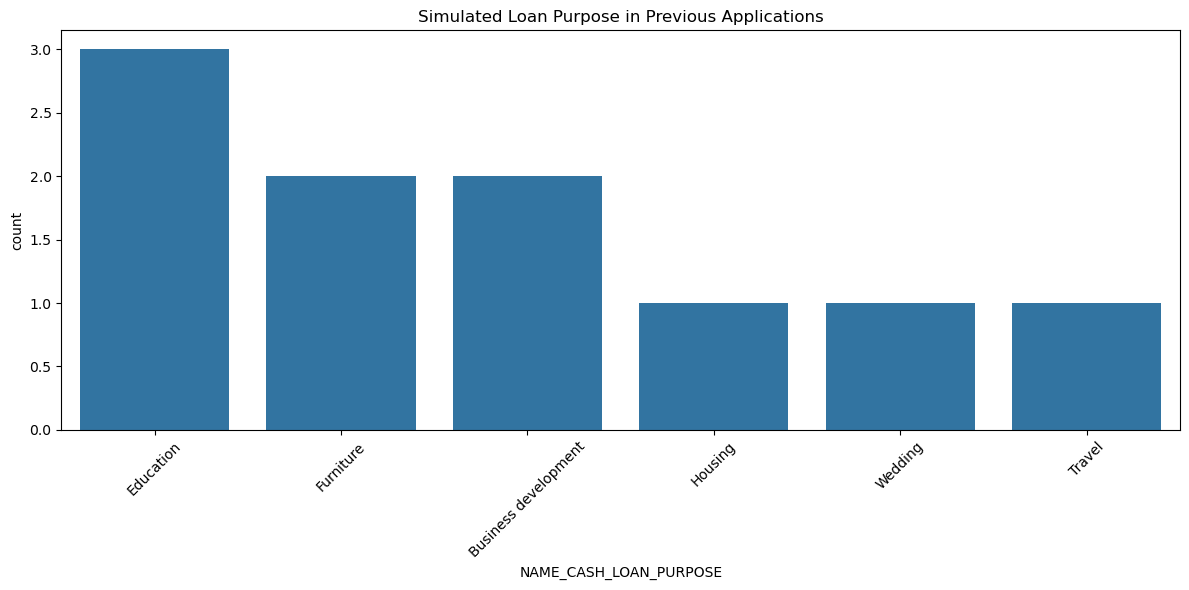

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(data=prev_data_cleaned, x='NAME_CASH_LOAN_PURPOSE', order=prev_data_cleaned['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Simulated Loan Purpose in Previous Applications")
plt.tight_layout()
plt.show()


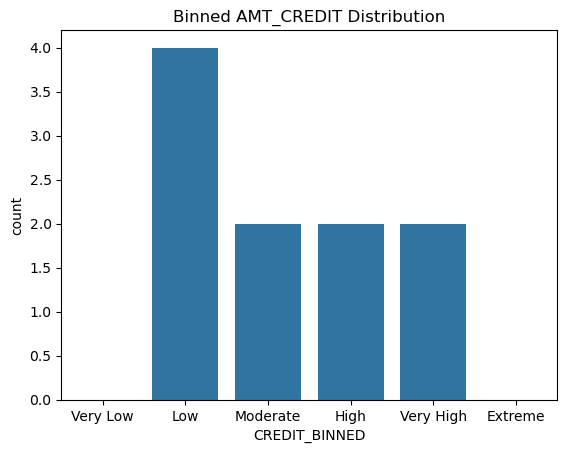

In [182]:
# Bin AMT_CREDIT into categories
credit_bins = [0, 50000, 150000, 300000, 500000, 1000000, np.inf]
credit_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High', 'Extreme']

prev_data_cleaned['CREDIT_BINNED'] = pd.cut(prev_data_cleaned['AMT_CREDIT'], bins=credit_bins, labels=credit_labels)

# Visualize
sns.countplot(x='CREDIT_BINNED', data=prev_data_cleaned, order=credit_labels)
plt.title("Binned AMT_CREDIT Distribution")
plt.show()


In [184]:
# Load application dataset
app_train = pd.read_csv("application.csv")  # Change filename if needed

# Check basic info
print(app_train[['SK_ID_CURR', 'TARGET']].head())


   SK_ID_CURR  TARGET
0      100001       1
1      100002       0
2      100003       0
3      100004       0
4      100005       0


In [185]:
# Merge to bring in the TARGET column
merged_df = prev_data_cleaned.merge(app_train[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')

# Correlation with TARGET (only numeric columns)
correlation = merged_df.corr(numeric_only=True)['TARGET'].sort_values(ascending=False)
print(correlation)


TARGET         1.000000
SK_ID_CURR    -0.037987
AMT_ANNUITY   -0.451523
AMT_CREDIT    -0.482637
Name: TARGET, dtype: float64


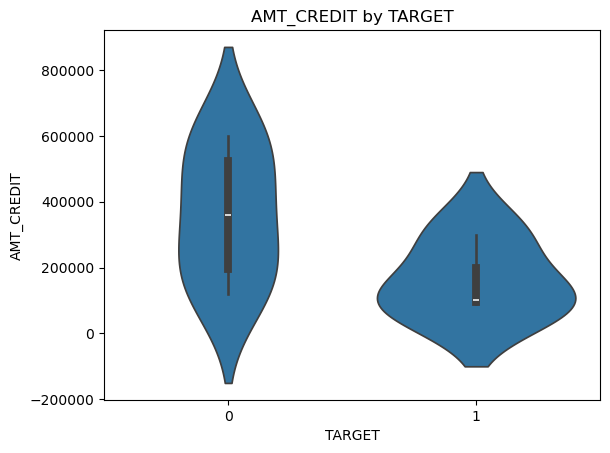

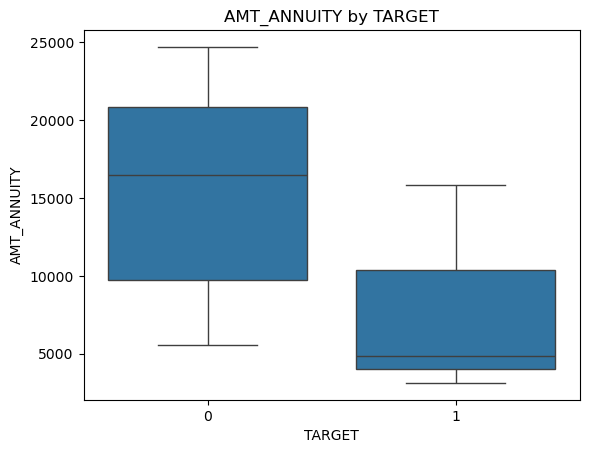

In [186]:
# Violin plot of AMT_CREDIT vs TARGET
sns.violinplot(x='TARGET', y='AMT_CREDIT', data=merged_df)
plt.title("AMT_CREDIT by TARGET")
plt.show()

# Box plot for Annuity
sns.boxplot(x='TARGET', y='AMT_ANNUITY', data=merged_df)
plt.title("AMT_ANNUITY by TARGET")
plt.show()


In [187]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Select features
features = ['AMT_CREDIT', 'AMT_ANNUITY', 'NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'CREDIT_BINNED']

# Encode categorical
df_model = merged_df[features + ['TARGET']].dropna().copy()
for col in ['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'CREDIT_BINNED']:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# Split
X = df_model.drop('TARGET', axis=1)
y = df_model['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [188]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



In [189]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [190]:
prev_data_cleaned.to_csv("prev_data_final_cleaned.csv", index=False)


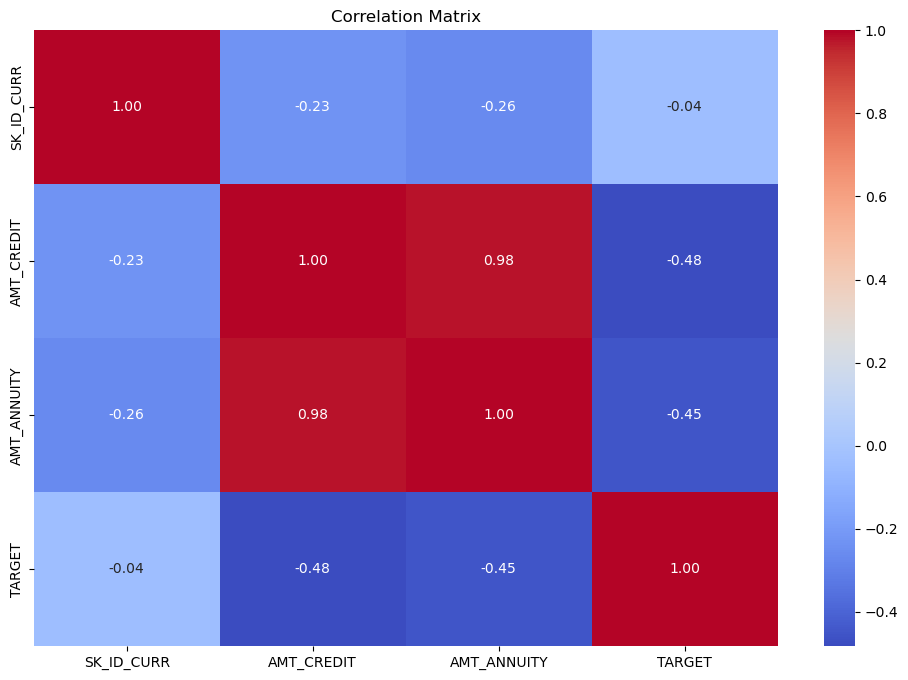

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [193]:
from sklearn.model_selection import train_test_split

# Drop ID and target column from features
X = merged_df.drop(columns=['SK_ID_CURR', 'TARGET'])
y = merged_df['TARGET']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [195]:
X.select_dtypes(include='object').columns


Index(['NAME_CONTRACT_STATUS', 'NAME_CLIENT_TYPE', 'NAME_CASH_LOAN_PURPOSE'], dtype='object')

In [196]:
# Recreate X and y after merging TARGET
X = merged_df.drop(columns=['SK_ID_CURR', 'TARGET'])
y = merged_df['TARGET']

# Convert categorical columns to one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)


In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("ROC AUC Score:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

ROC AUC Score: 1.0


In [200]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

ROC AUC Score: 1.0


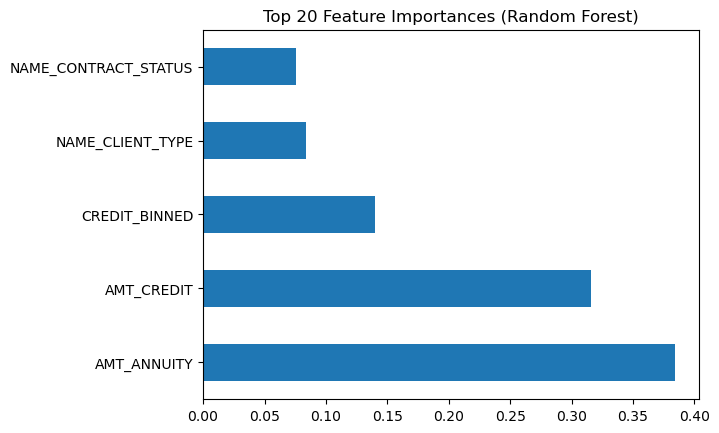

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()


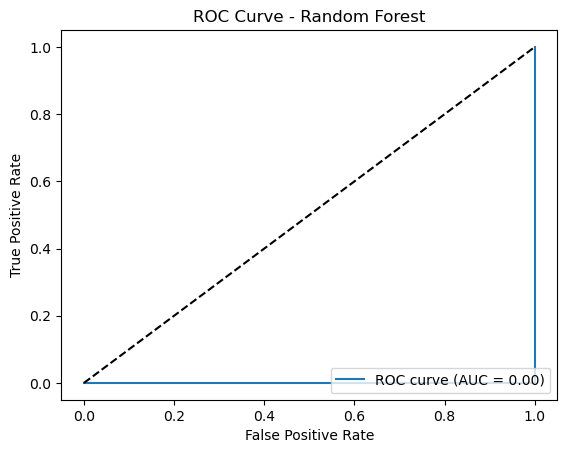

In [202]:
# Recreate train-test split with the final cleaned and encoded dataset
from sklearn.model_selection import train_test_split

# Assuming you have X_encoded (your latest cleaned dataset) and target column 'TARGET'
X = merged_df.drop(columns=['TARGET'])
y = merged_df['TARGET']

# Re-encode X (if it has object/categorical columns)
X_encoded = pd.get_dummies(X, drop_first=True)

# Split again
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Retrain the model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Now it will work
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


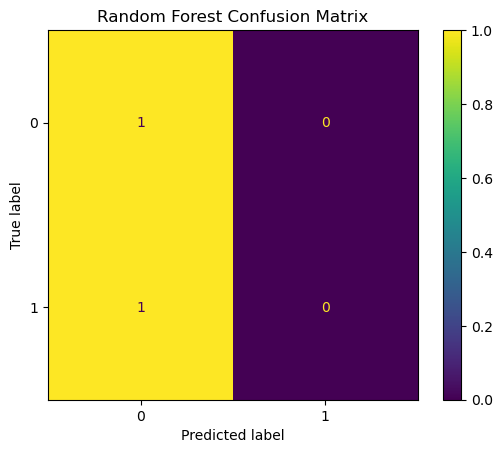

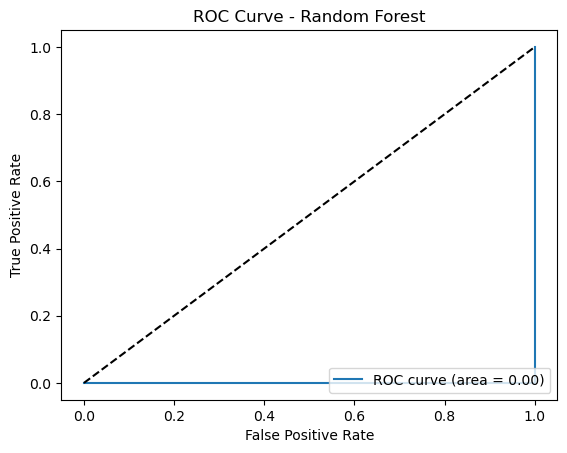

In [203]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt

# Confusion matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()


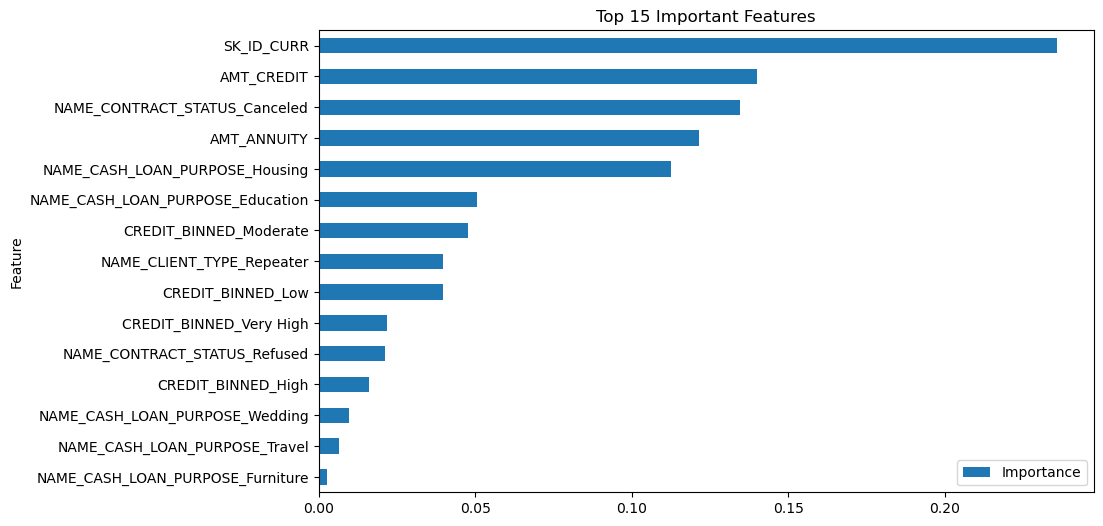

In [204]:
import pandas as pd
import numpy as np

importances = rf_model.feature_importances_
features = X_encoded.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 15 features
feature_importance_df.head(15).plot(x='Feature', y='Importance', kind='barh', figsize=(10,6), title='Top 15 Important Features')
plt.gca().invert_yaxis()
plt.show()


In [205]:
# Save cleaned merged dataset
merged_df.to_csv("final_eda_credits_cleaned.csv", index=False)
